In [85]:
import pandas as pd
from scipy.io import arff

data = arff.loadarff('breast.w.arff')
df = pd.DataFrame(data[0])
df.dropna(inplace=True)
df.replace(b'benign', 0, inplace=True)
df.replace(b'malignant', 1, inplace=True)

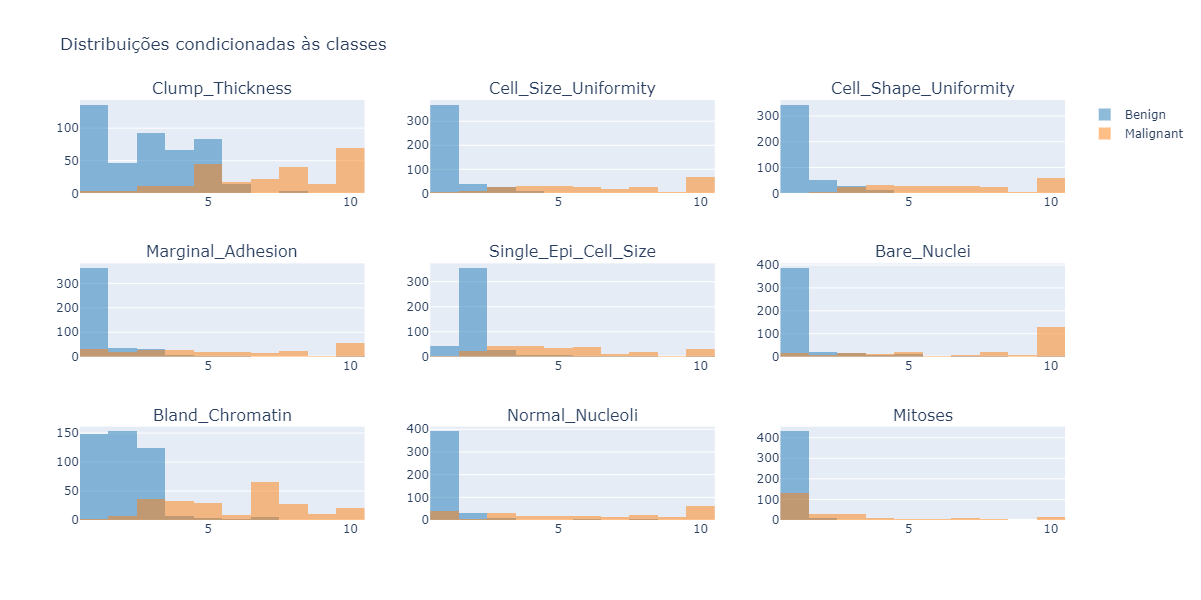

In [78]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

b = df[df["Class"] == 0]
m = df[df["Class"] == 1]

grid = make_subplots(rows=3, cols=3, subplot_titles=["Clump_Thickness","Cell_Size_Uniformity","Cell_Shape_Uniformity","Marginal_Adhesion","Single_Epi_Cell_Size","Bare_Nuclei","Bland_Chromatin"
,"Normal_Nucleoli","Mitoses"])
i = 0
legend_flag = True
for col in ["Clump_Thickness","Cell_Size_Uniformity","Cell_Shape_Uniformity","Marginal_Adhesion","Single_Epi_Cell_Size","Bare_Nuclei","Bland_Chromatin"
,"Normal_Nucleoli","Mitoses"]:
    fig = go.Histogram(x=b[col],nbinsx=10,opacity=0.5,name="Benign", showlegend=legend_flag)
    grid.append_trace(fig, i//3+1, (i%3)+1)
    fig = go.Histogram(x=m[col],nbinsx=10,opacity=0.5,name="Malignant", showlegend=legend_flag)
    grid.append_trace(fig, i//3+1, (i%3)+1)
    if i == 0: legend_flag=False
    i += 1

grid.update_layout(height=600, width=800, title_text="Distribuições condicionadas às classes", barmode="overlay", showlegend=True, colorway=["#1f77b4", "#ff7f0e"])
grid.show()


In [86]:
from sklearn import model_selection, neighbors
from sklearn.metrics import accuracy_score
import numpy as np

data = df.drop(["Class"],axis=1).values
target = df["Class"].values

fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=9)
scores = [[],[],[]]
i = 0
for k in [3,5,7]:
    KNN=neighbors.KNeighborsClassifier(n_neighbors=k,p=2,weights="uniform")
    for train_filter, test_filter in fold.split(data):
        data_train, data_test, target_train, target_test = data[train_filter], data[test_filter], target[train_filter], target[test_filter]
        
        KNN.fit(data_train,target_train)
        predictions=KNN.predict(data_test)
        scores[i].append([accuracy_score(target_test,predictions)])
    i += 1

for i in range(3):
    print("k=", 2*i+3, np.array(scores)[i].mean())

k= 3 0.9662617220801364
k= 5 0.9735507246376811
k= 7 0.9677323103154306


In [87]:
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn.naive_bayes import MultinomialNB

KNN=neighbors.KNeighborsClassifier(n_neighbors=3,p=2,weights="uniform")
NB=MultinomialNB()
fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=9)
score_NB = []
score_KNN = []

for train_filter, test_filter in fold.split(data):
    data_train = data[train_filter]
    data_test = data[test_filter]
    target_train = target[train_filter]
    target_test = target[test_filter]
    
    KNN.fit(data_train,target_train)
    predictions_KNN=KNN.predict(data_test)
    score_KNN.append(accuracy_score(target_test,predictions_KNN))
    
    NB.fit(data_train,target_train)
    predictions_NB=NB.predict(data_test)
    score_NB.append(accuracy_score(target_test,predictions_NB))

print("KNN", np.array(score_KNN).mean(), "NB", np.array(score_NB).mean())

stats.ttest_rel(score_KNN, score_NB, alternative="greater")

KNN 0.9662617220801364 NB 0.9018542199488492


Ttest_relResult(statistic=5.666564325957829, pvalue=0.00015353096761064943)

In [88]:
from sklearn import model_selection, neighbors
from sklearn.metrics import accuracy_score
import numpy as np

data = df.drop(["Class"],axis=1).values
target = df["Class"].values

fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=9)
scores_over = [[],[],[]]
scores = [[],[],[]]

i = 0
for k in [3,5,7]:
    KNN=neighbors.KNeighborsClassifier(n_neighbors=k,p=2,weights="uniform")
    for train_filter, test_filter in fold.split(data):
        data_train, data_test, target_train, target_test = data[train_filter], data[test_filter], target[train_filter], target[test_filter]
        
        KNN.fit(data_train,target_train)
        predictions=KNN.predict(data_test)
        scores[i].append([accuracy_score(target_test,predictions)])
        
        KNN.fit(data_train,target_train)
        predictions=KNN.predict(data_train)
        scores_over[i].append([accuracy_score(target_train,predictions)])
    i += 1

for i in range(3):
    print("k=", 2*i+3, np.array(scores_over[i]).mean())
print()

for i in range(3):
    print("k=", 2*i+3, np.array(scores[i]).mean())
print()

for i in range(3):
    print("k=", 2*i+3, np.array(scores_over[i]).mean() - np.array(scores[i]).mean())
print()

k= 3 0.980314875135722
k= 5 0.9804769471147479
k= 7 0.9793387357326342

k= 3 0.9662617220801364
k= 5 0.9735507246376811
k= 7 0.9677323103154306

k= 3 0.014053153055585632
k= 5 0.006926222477066757
k= 7 0.01160642541720358



# All in One

In [89]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection, neighbors
from sklearn.metrics import accuracy_score
from scipy import stats

data = arff.loadarff('breast.w.arff')
df = pd.DataFrame(data[0])
df.dropna(inplace=True)
df.replace(b'benign', 0, inplace=True)
df.replace(b'malignant', 1, inplace=True)
data = df.drop(["Class"],axis=1).values
target = df["Class"].values

fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=9)
NB = MultinomialNB()
scores_overfit_KNN = [[],[],[]]
scores_KNN = [[],[],[]]
scores_NB = []

i = 0
for k in [3,5,7]:
    KNN=neighbors.KNeighborsClassifier(n_neighbors=k,p=2,weights="uniform")
    for train_filter, test_filter in fold.split(data):
        data_train, data_test, target_train, target_test = data[train_filter], data[test_filter], target[train_filter], target[test_filter]
        
        KNN.fit(data_train,target_train)
        predictions = KNN.predict(data_test)
        scores_KNN[i].append(accuracy_score(target_test,predictions))
        
        KNN.fit(data_train,target_train)
        predictions = KNN.predict(data_train)
        scores_overfit_KNN[i].append(accuracy_score(target_train,predictions))
        
        if (k == 3):
            NB.fit(data_train,target_train)
            predictions = NB.predict(data_test)
            scores_NB.append(accuracy_score(target_test,predictions))
    i += 1

print("KNN accuracy means:")
for i in range(3):
    print("  k =", 2*i+3, np.array(scores_KNN[i]).mean())
print()

overfit_delta = []
for i in range(3):
    overfit_delta.append(np.array(scores_overfit_KNN[i]).mean() - np.array(scores_KNN[i]).mean())
print("Less susceptible to overfitting: k =", 2*overfit_delta.index(min(overfit_delta))+3)
print()

print("P-value:", stats.ttest_rel(scores_KNN[0], scores_NB, alternative="greater").pvalue)

KNN accuracy means:
  k = 3 0.9662617220801364
  k = 5 0.9735507246376811
  k = 7 0.9677323103154306

Less susceptible to overfitting: k = 5

P-value: 0.00015353096761064943
